In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import json
import os

# 1. Processing the dataset

In [3]:
train_path = r"/kaggle/input/cards-image-datasetclassification/train"
test_path = r"/kaggle/input/cards-image-datasetclassification/test"
validation_path = r"/kaggle/input/cards-image-datasetclassification/valid"

In [4]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# Data Augmentation sólo para TRAIN
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    vertical_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    class_mode ="categorical"
)

val_generator = val_datagen.flow_from_directory(
    validation_path,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    class_mode="categorical",
    shuffle=False
)

test_generator = val_datagen.flow_from_directory(
    test_path,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


# 2. Modelo v2 MobileNet (Transfer Learning)

In [5]:
NUM_CLASSES = 53
IMG_SIZE = (224,224)

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)

base_model.trainable = False

model_v2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.3),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model_v2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
print(">> Entrenando Modelo v2 (Transfer Learning con MobileNetV2)")
history_v2 = model_v2.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

>> Entrenando Modelo v2 (Transfer Learning con MobileNetV2)
Epoch 1/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 97s 395ms/step - accuracy: 0.4350 - loss: 1.8299 - val_accuracy: 0.5019 - val_loss: 1.5026
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 89s 361ms/step - accuracy: 0.4374 - loss: 1.7788 - val_accuracy: 0.5094 - val_loss: 1.5437
Epoch 3/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 89s 361ms/step - accuracy: 0.4460 - loss: 1.7969 - val_accuracy: 0.5057 - val_loss: 1.5068
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 88s 359ms/step - accuracy: 0.4535 - loss: 1.7635 - val_accuracy: 0.4943 - val_loss: 1.4542
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 88s 356ms/step - accuracy: 0.4600 - loss: 1.7388 - val_accuracy: 0.5434 - val_loss: 1.5040
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 87s 356ms/step - accuracy: 0.4647 - loss: 1.7098 - val_accuracy: 0.4981 - val_loss: 1.4823
Epoch 7/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 86s 348ms/step - accuracy: 0.4709 - loss: 1.7161 - val_accuracy: 0.5283 - val_loss: 1.4967
Epoch 8/30
239/239 ━━━━

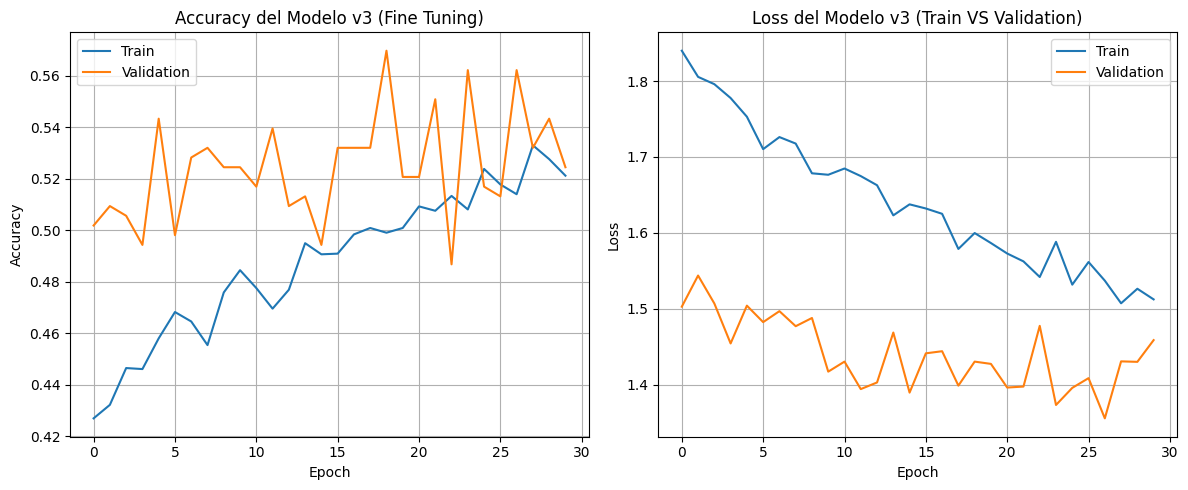

In [12]:
hist_v2_df = pd.DataFrame(history_v2.history)

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
hist_v2_df[['accuracy', 'val_accuracy']].plot(ax=plt.gca())
plt.title("Accuracy del Modelo v3 (Fine Tuning)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
hist_v2_df[['loss', 'val_loss']].plot(ax=plt.gca())
plt.title("Loss del Modelo v3 (Train VS Validation)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
class_names = sorted(os.listdir(train_path))
print(f"Nombres de las clases encontradas: {class_names}")
print(f"Número total de clases: {len(class_names)}")

Nombres de las clases encontradas: ['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']
Número


>> Evaluación del Modelo v2 con TEST
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
                   precision    recall  f1-score   support

     ace of clubs       0.83      1.00      0.91         5
  ace of diamonds       0.71      1.00      0.83         5
    ace of hearts       0.50      0.80      0.62         5
    ace of spades       0.50      1.00      0.67         5
   eight of clubs       0.25      0.40      0.31         5
eight of diamonds       0.40      0.80      0.53         5
  eight of hearts       0.80      0.80      0.80         5
  eight of spades       0.50      0.40      0.44         5
    five of clubs       0.57      0.80      0.67         5
 five of diamonds       0.67      0.80      0.73         5
   five of hearts       0.75      0.60      0.67         5
   five of spades       0.33      0.60      0.43         5
    four of clubs       0.67      0.40      0.50         5
 four of diamonds       1.00      0.80      0.89         5
   four of hearts       1.00      1.00

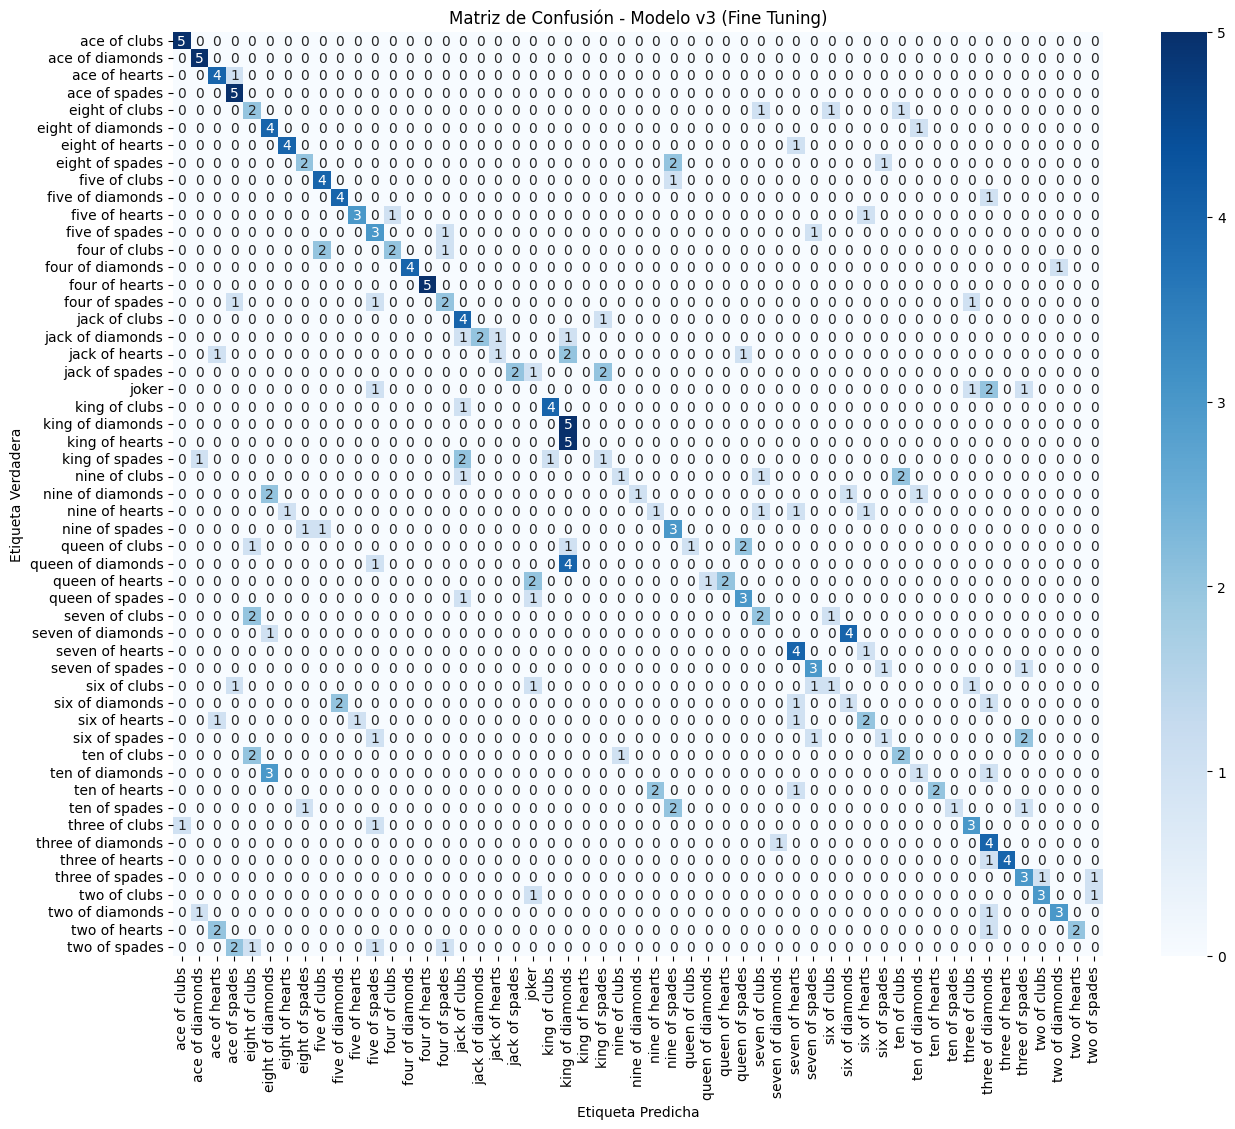

In [16]:
print("\n>> Evaluación del Modelo v2 con TEST")

# Obtener predicciones
y_pred_prob_v2 = model_v2.predict(test_generator)
y_pred_v2= np.argmax(y_pred_prob_v2, axis=1)
y_true = test_generator.classes

print(classification_report(y_true, y_pred_v2, target_names=class_names, zero_division=0))

# Matriz de Confusión
cm_v2 = confusion_matrix(y_true, y_pred_v2)
cm_v2_df = pd.DataFrame(cm_v2, index=class_names, columns=class_names)

plt.figure(figsize=(15, 12))
sns.heatmap(cm_v2_df, annot=True, fmt="g", cmap="Blues")
plt.title("Matriz de Confusión - Modelo v3 (Fine Tuning)")
plt.ylabel("Etiqueta Verdadera")
plt.xlabel("Etiqueta Predicha")
plt.show()

In [15]:
PROJECT_PATH = "/kaggle/working/"

model_v2.save(PROJECT_PATH + "classifier_model_v2.h5")
print(f">> Modelo v2 guardado exitosamente en {PROJECT_PATH}classifier_model_v2.h5")

with open(PROJECT_PATH + 'history_v2.json', 'w') as f:
    json.dump(history_v2.history, f)
    print(f">> Historial v2 guardado exitosamente en {PROJECT_PATH}history_v2.json")

>> Modelo v2 guardado exitosamente en /kaggle/working/classifier_model_v2.h5
>> Historial v2 guardado exitosamente en /kaggle/working/history_v2.json
